**Importing the necessary libraries**

In [ ]:
pip install -q -U keras-tuner

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow import keras
import keras_tuner as kt



**Loading the data**



In [ ]:
train_ds = pd.read_csv ('MNIST_dataset.csv')
test_ds = pd.read_csv ('MNIST_dataset.csv')

train_y = train_ds['labels']
train_x = train_ds.drop('labels', axis = 1)
test_y = test_ds['labels']
test_x = test_ds.drop('labels', axis = 1)




**Checking the actual size of the dataset**


In [ ]:
print('Train: x=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: x=%s, y=%s' % (test_x.shape, test_y.shape))


Train: x=(200, 784), y=(200,)
Test: x=(200, 784), y=(200,)


**Preprocessing**

Normalizing pixel values of the grayscale images, e.g rescaling to the 
range [0,1]. Converting the data type from unsigned integers to floats, then dividing pixel values by the max value.

In [ ]:
train_norm, test_norm = train_x.astype('float32'), test_x.astype('float32')
train_norm, test_norm = train_x/255.0, test_x/255.0

**Developing the model**

the first layer of the model will be a flattened layer, it removes the dimensions of the array into a one dimensional array. Next layer is a dense layer, a fully connected layer with 128 units. Next layer is dropout layer which prevents the model from "overfeeding". we set it to 0.2 which is 20% for each iteration. The last layer corresponds to the number of input classes.

For the first model you can see the network has been tweaked in the sence of fewer nodes in the first Dense layer and the overfeeding parameter has been adjusted. The number of epochs is quite small in order to fulfill the criterias of underfitting. On the other hand, if we would've increased the numbers of epochs the case of overfitting would be great since our training and test set is extremely small (compared to other datasets we've worked with). If the network trains for too long, the model starts overfitting and learning patterns that dont generalize to the training data. I did a test of this with 500 epochs which can be seen in the history.history call.




In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784,)),
        tf.keras.layers.Dense(164),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss = loss,
              metrics=['accuracy'])

print("Fit model on training data:")
model.fit(train_x, train_y, epochs=5)


Fit model on training data:
Epoch 1/5
7/7 [==============================] - 0s 4ms/step - loss: 242.3452 - accuracy: 0.1800
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: 107.4737 - accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 60.6931 - accuracy: 0.5950
Epoch 4/5
7/7 [==============================] - 0s 5ms/step - loss: 47.7759 - accuracy: 0.7050
Epoch 5/5
7/7 [==============================] - 0s 4ms/step - loss: 24.8758 - accuracy: 0.8300


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784, 1)),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
])

**Summary of the model**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**The computation of crossentropy loss between labels and predictions**

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

**Adam stochastic optimization.**

i decided to use Adam because i find it effective and the best solution for such a small dataset. I tried different learning rates also.





In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = loss,
              metrics=['accuracy'])

**Fitting the model on the train sets.**


In [ ]:
print("Fit model on training data:")
history = model.fit(train_x, train_y, epochs=10)

Fit model on training data:
Epoch 1/10
7/7 [==============================] - 0s 5ms/step - loss: 498.9153 - accuracy: 0.3050
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 190.9231 - accuracy: 0.7050
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 83.8256 - accuracy: 0.8300
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 38.9627 - accuracy: 0.8950
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 25.8055 - accuracy: 0.9300
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 10.2892 - accuracy: 0.9600
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 9.6917 - accuracy: 0.9500
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.8344 - accuracy: 0.9900
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 6.1632 - accuracy: 0.9800
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 3.1935 - accuracy: 0.9900


**Evaluating the models performance using Adam optimization**

In [ ]:
score = model.evaluate(test_x, test_y)
print(f'Test loss: {score[0]} % / Test accuracy: {score[1] * 100} %')

7/7 [==============================] - 0s 3ms/step - loss: 4.3693 - accuracy: 0.9800
Test loss: 4.369262218475342 % / Test accuracy: 98.00000190734863 %


**Saving the model for further usage**

In [ ]:
filepath = './saved_model'
save_model(model, filepath)
#model = load_model(filepath, compile = True)

INFO:tensorflow:Assets written to: ./saved_model/assets


**going through the history of the model using adam**

In [ ]:
history.history
#TODO plot adam

{'accuracy': [0.3050000071525574,
  0.7049999833106995,
  0.8299999833106995,
  0.8949999809265137,
  0.9300000071525574,
  0.9599999785423279,
  0.949999988079071,
  0.9900000095367432,
  0.9800000190734863,
  0.9900000095367432],
 'loss': [498.9153137207031,
  190.92306518554688,
  83.82556915283203,
  38.962650299072266,
  25.8055419921875,
  10.28924560546875,
  9.691704750061035,
  0.8343769907951355,
  6.163155555725098,
  3.193510055541992]}

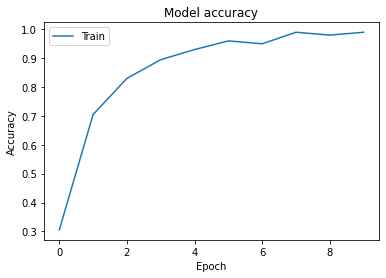

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

**Using the SGD algorithm**

As you can see, SDG computes 100% correct with a much smaller model, one input layer and one dense layer with the corresponding value of the number of classes. Given the same model as the adam optimizer it returns a max accuracy of 8.5%. is the case here overfitting?

In [ ]:
model_sdg = tf.keras.Sequential(
  [
      tf.keras.layers.InputLayer(input_shape=(784,)),
      tf.keras.layers.Dense(10)
  ])

model_sdg.compile(optimizer='sgd',
              loss=loss,
              metrics=['accuracy'])

# print model layers
model_sdg.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Fit model on training data:")
history_sdg = model_sdg.fit(train_x, train_y, epochs=8)

Fit model on training data:
Epoch 1/8
7/7 [==============================] - 0s 3ms/step - loss: 2414.8633 - accuracy: 0.3050
Epoch 2/8
7/7 [==============================] - 0s 3ms/step - loss: 2126.9941 - accuracy: 0.4850
Epoch 3/8
7/7 [==============================] - 0s 3ms/step - loss: 363.8555 - accuracy: 0.7800
Epoch 4/8
7/7 [==============================] - 0s 3ms/step - loss: 52.0080 - accuracy: 0.9500
Epoch 5/8
7/7 [==============================] - 0s 3ms/step - loss: 48.7485 - accuracy: 0.9450
Epoch 6/8
7/7 [==============================] - 0s 4ms/step - loss: 28.0158 - accuracy: 0.9600
Epoch 7/8
7/7 [==============================] - 0s 2ms/step - loss: 7.0981 - accuracy: 0.9800
Epoch 8/8
7/7 [==============================] - 0s 2ms/step - loss: 5.8540 - accuracy: 0.9850


**SGD evaluation**

In [ ]:
score = model_sdg.evaluate(test_x, test_y)
print(f'Test loss: {score[0]} % / Test accuracy: {score[1] * 100} %')

7/7 [==============================] - 0s 3ms/step - loss: 67.4380 - accuracy: 0.9400
Test loss: 67.43799591064453 % / Test accuracy: 93.99999976158142 %


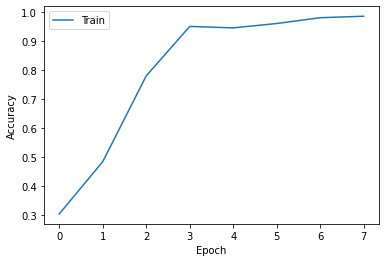

In [ ]:
plt.plot(history_sdg.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

**SDG with momentum**

after a single epoch, the optimizers loss has significally improved. its faster, and widely known as an improvment on SGD for optimizing neural networks.



Fit model on training data:
Epoch 1/8
7/7 [==============================] - 0s 3ms/step - loss: 49.7108 - accuracy: 0.9750
Epoch 2/8
7/7 [==============================] - 0s 2ms/step - loss: 7.2881 - accuracy: 0.9950
Epoch 3/8
7/7 [==============================] - 0s 3ms/step - loss: 34.3623 - accuracy: 0.9900
Epoch 4/8
7/7 [==============================] - 0s 3ms/step - loss: 25.9894 - accuracy: 0.9900
Epoch 5/8
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/8
7/7 [==============================] - 0s 3ms/step - loss: 196.7153 - accuracy: 0.9650
Epoch 7/8
7/7 [==============================] - 0s 2ms/step - loss: 5.2917 - accuracy: 0.9950
Epoch 8/8
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test loss: 0.0 % / Test accuracy: 100.0 %


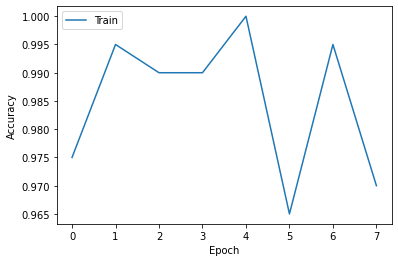

In [ ]:
model_sdg.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum= 0.9),
              loss=loss,
              metrics=['accuracy'])
print("Fit model on training data:")
history_sdg = model_sdg.fit(train_x, train_y, epochs=8)
score = model_sdg.evaluate(test_x, test_y)
print(f'Test loss: {score[0]} % / Test accuracy: {score[1] * 100} %')

plt.plot(history_sdg.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')